# Recommendation System - Book Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df =pd.read_csv("book.csv",encoding='latin-1')

In [3]:
df.head()

,Unnamed: 0,User.ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6


In [4]:
# Changing column names
df.columns = ['book_index','user_id','book_name','rating']

In [5]:
df.head()

,book_index,user_id,book_name,rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6


In [6]:
#df = df.drop('Index',axis=1)

In [7]:
df.sort_values('rating',ascending=False).iloc[:10,:]

,book_index,user_id,book_name,rating
7785,7786,3943,The Bunyans,10
2318,2319,278750,Sit &amp; Solve - Lateral Thinking Puzzles,10
2325,2326,278772,Feeling Good : The New Mood Therapy,10
5634,5635,2453,O Little Town Of Glory (Men Of Glory) (Harleq...,10
2340,2341,278807,Women Can't Hear What Men Don't Say: Destroyin...,10
2341,2342,278818,Northanger Abbey (Bantam Classic),10
2348,2349,278831,Jerk on One End: Reflections of a Mediocre Fis...,10
2349,2350,278832,Prize the Epic Quest for Oil Money and Pow,10
2350,2351,278832,DEVIL IN A BLUE DRESS (Easy Rawlins Mysteries ...,10
2351,2352,278832,The Sum of All Fears (Jack Ryan Novels),10


<BarContainer object of 10 artists>

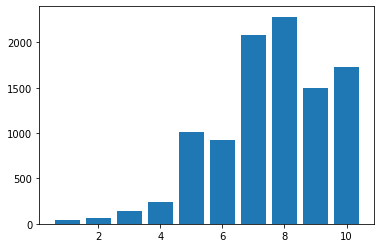

In [8]:
plt.bar(height=df.rating.value_counts().sort_index(),x=range(1,11))

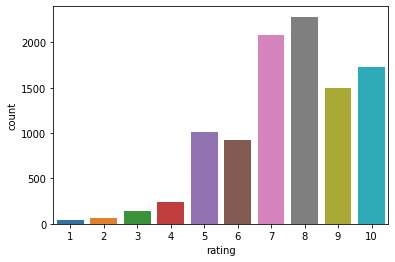

In [9]:
sns.countplot(x='rating',data=df)

In [10]:
#sns.countplot(x='user_id',data=df)

In [11]:
df['user_id'].nunique()

2182

There are 2182 users in the dataset

In [12]:
df.shape

(10000, 4)

In [13]:
len(df['book_name'].unique())

9659

There are 9659 unique book in the dataset

In [14]:
df.isnull().sum()

book_index    0
user_id       0
book_name     0
rating        0
dtype: int64

No Null values in Dataset

In [15]:
# Creating New df to get unique book_id
df_n =df.drop_duplicates('book_name',keep='first')

In [16]:
book_id = pd.Series(df_n.index,index=df_n["book_name"])

In [17]:
len(book_id)

9659

#### Creating TFIDF matrix with original dataframe

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words="english")

In [19]:
tfidf_matrix = tfidf.fit_transform(df.book_name)

In [20]:
tfidf_matrix.shape

(10000, 11435)

#### Creating Cosine similarity matrix

In [21]:
from sklearn.metrics.pairwise import linear_kernel

In [22]:
cosine_sim_matrix = linear_kernel(tfidf_matrix,tfidf_matrix)

In [23]:
cosine_sim_matrix.shape

(10000, 10000)

### Creating recommendation method

In [24]:
def get_book_rec(book,topn):
    bookid = book_id[book]
    cosine_scores = list(enumerate(cosine_sim_matrix[bookid]))
    cosine_scores = sorted(cosine_scores,key=lambda x:x[1],reverse = True)
    cosine_scores_n = cosine_scores[0:topn+1]
    book_idx  =  [i[0] for i in cosine_scores_n]
    book_scores =  [i[1] for i in cosine_scores_n]
    
    similar_books=pd.DataFrame(columns=["Book","Score"])
    similar_books['Book']= df.loc[book_idx,"book_name"]
    similar_books['Score']= book_scores
    similar_books.reset_index(inplace=True)
    similar_books.drop("index",axis=1,inplace=True)
    print(similar_books)
    

### Let's try some recommendation based on book_name

In [25]:
get_book_rec("Decision in Normandy",5)

                                                Book     Score
0                               Decision in Normandy  1.000000
1          Currahee!:  A Screaming Eagle at Normandy  0.318337
2  If You Survive: From Normandy to the Battle of...  0.209653
3  Band of Brothers : E Company, 506th Regiment, ...  0.194342
4  The Journal of Scott Pendleton Collins: A Worl...  0.185605
5                                Classical Mythology  0.000000


We see that person reading book "Decision in Normandy" is been recommended 5 other book from index[1-5] based on the cosine_scores.
Lets try few more examples

In [26]:
get_book_rec("Clara Callan",5)

                                                Book  Score
0                                       Clara Callan    1.0
1                                Classical Mythology    0.0
2                               Decision in Normandy    0.0
3  Flu: The Story of the Great Influenza Pandemic...    0.0
4                             The Mummies of Urumchi    0.0
5                             The Kitchen God's Wife    0.0


Here we see that user reading "Clara Callan" is recommended with first 5 books of dataset as it has cosine similarity is 0.

In [27]:
df[df["book_name"]=="Clara Callan"]

,book_index,user_id,book_name,rating
1,2,276729,Clara Callan,3


In [28]:
get_book_rec("The Kitchen God's Wife",5)

                                              Book     Score
0                           The Kitchen God's Wife  1.000000
1                           The Kitchen God's Wife  1.000000
2  The Kitchen God's Wife (Vintage Contemporaries)  0.801084
3                                          Kitchen  0.624005
4                                  The Kitchen Boy  0.465029
5                               Another Man's Wife  0.450221
